<a href="https://www.kaggle.com/code/abdulrahmanalabrash/clustering-mall-customers?scriptVersionId=186238635" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data mining 

This notebook discusses an application of data mining technique through a simple example. The example is about mall customers. There are some basic data about the customers like customer ID, age, gender, annual income and spending score. And through this data and by unsupervised data mining (clustering) we are going to try to understand the customer, so we understand who can be the target customer so that the sense can be given to marketing team and plan the strategy acordingly.

## Import the data

This data were taken from kaggle https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
# import necessary library 
import pandas as pd
# read the data and store is in data frame cold dataFrame
dataFrame = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
# Print a suumary of the data
dataFrame

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


First thing first, to start working on the data we have to undurstand the data in our hands.
- What are the featurs of the data?
- How many example points the data have? 
- What are the inputs and  the outputs ?
- Is there any  mising data? 

In [2]:
# Print the columns(features) of the data
dataFrame.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Here we can see that we have five features of the data in our hands
- CistomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

In [3]:
# print the dimensions of the data to know the number of training points.
dataFrame.shape

(200, 5)

We cans see that there are 200 training examples for the five attributes. Obviously, the data is  small for identifying the clusters, but this data is created for learning process.

Let us start with data mining steps.

## 1. Data Cleaning

To avoid the  missleading of the data we have to handle the missing data if there is any. That will give us better results in data mining process. 

In [4]:
# check for the number of missing data.
dataFrame.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
# the total number of missing values in the data set.
print("The colums \t Number of missing values ")
print(dataFrame.isna().sum())

The colums 	 Number of missing values 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Obviously, there is no missing values in our data set. 

## 2. Data Integration 

In this process, the data is combined together, if it is gathered from different sources. The data in our hands was taken from one source (Kaggle) with one csv file. So, there is no need for this step.

## 3. Data Selection

Not all the features are relevent to our analysis task. So, in this step we are going to choose the features which are relevent to our target. Oftenly, it is betetr to train our model with only signeficant features than to train it with all the features, includding unnecessary ones. It does nott only help in efficient modeling, but also  the traing of the model can happen in much lesser time.

Obviosly, the CustomerID feature does not have significant impact on the training.So, we can drop it from the data set. And the other four features have different effect on the target.

In [6]:
# drop the 'CustomerID' feature from the data and store it in another data frame called selectedData
selectedData = dataFrame.drop(['CustomerID'] , axis= 1)
selectedData

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## 4. Data Transformation

### 4.1 Encoding

Before starting with data mining, we need some data preprocessing. Not all the feature values are from the same type. Some of them are numerical and some of them are not. In order to utilize computaions , we will feed the model with  all numerical data.

In [7]:
# the data types of the differnet attributes
selectedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


We can see that except  Gende,r all other  features are numerical. So, we have to convert it to numerical value as well.

In [8]:
# import necessary function
from sklearn.preprocessing import LabelEncoder
# Convert Gender fearture to a numerical one
labelEncoder = LabelEncoder()
labelEncoder.fit(selectedData['Gender'])
selectedData['Gender'] = labelEncoder.transform(selectedData['Gender'])
selectedData

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### 4.2 Normalization

We can see from the data description that the ranges of the data change from one feature to another. And this can cause a missclustering  since some algorithms depend on the distance between example points. So, it is better to scale the values of the features between two values (0-1) in order to get better results in clustering  and data mining.

In [9]:
# import necessary function for scaling
from sklearn.preprocessing import MinMaxScaler
# scale the attribute values between zero and one
scaler = MinMaxScaler(copy = False)
scaler.fit(selectedData[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']])
selectedData[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.transform(selectedData[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']])
selectedData

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0,0.326923,0.860656,0.795918
196,0,0.519231,0.909836,0.275510
197,1,0.269231,0.909836,0.744898
198,1,0.269231,1.000000,0.173469


## 5. Data mining

There are many methods and algorithms to slove data mining problems. In our example today we are going to solve this problem with K-Mean algorithm. It is such a simple algorithm which is suitable to our example. However, the problem with this method is that we have to choose the number of clusters in advance.

 ## First Model with Gender, Age, Annual income, and Spending score.

In [10]:
# define a new data frame with four needed features.
firstModel = selectedData[['Gender' , 'Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]
firstModel

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0,0.326923,0.860656,0.795918
196,0,0.519231,0.909836,0.275510
197,1,0.269231,0.909836,0.744898
198,1,0.269231,1.000000,0.173469


### 5.1 Number of clusters 

We are going to use the elbow method to choose the optimal number of clusters suitable to our data. And that's done by solving the algorithm for different values and calcualte WCSS (Within-Cluster-Sum-of-Squares). And from the plot of the realtionship between the number of clusters and the value of WCSS we can pick the elbow of the curve, which is the optimal number of clusters.

In [11]:
# import KMeans function
from sklearn.cluster import KMeans

# assume that the maximum number of clusters can be 10
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(firstModel)
    wcssIter = kmeans.inertia_ # find the value of wcss of the ith cluster
    wcss.append(wcssIter)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Visualizing the ELBOW to get the optimal value of k.

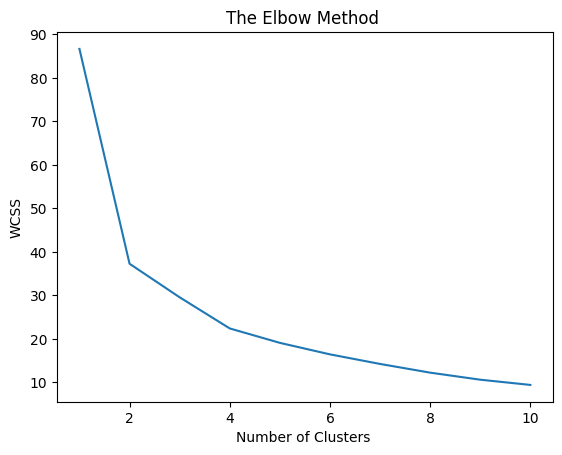

In [12]:
# import necessary data
import matplotlib.pyplot as plt
%matplotlib inline
# plot
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method ')
plt.xlabel('Number of Clusters ')
plt.ylabel('WCSS')
plt.show()

## 5.2 Fit the model

We are going to use Kmeans algorithm to fit the model with k number that we found by the elbow method.

In [13]:
# fit the model 
kmeansModel = KMeans(n_clusters = 2 , random_state = 0)
y_kmeans = kmeansModel.fit_predict(firstModel)
firstModel['Clusters'] = y_kmeans
print(y_kmeans)

[0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


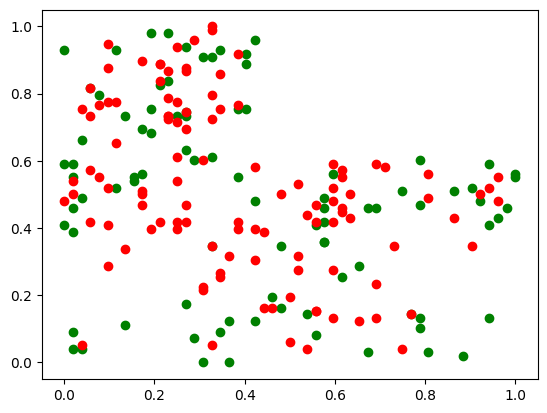

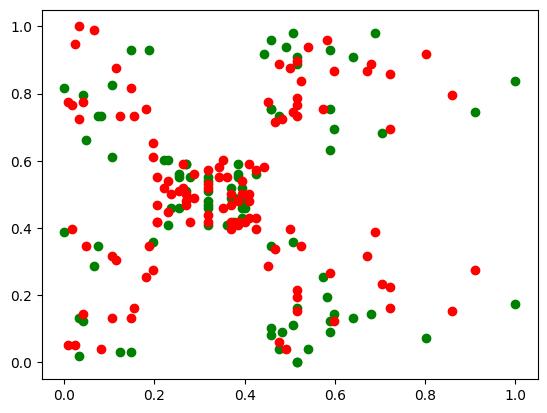

In [14]:
# Define the clusters of the different arrays
x1 = firstModel[firstModel.Clusters == 0] 
x2 = firstModel[firstModel.Clusters == 1] 
# plot the clusters with diffrenet colors
plt.scatter(x1['Age'],x1['Spending Score (1-100)'],color='green')
plt.scatter(x2['Age'],x2['Spending Score (1-100)'],color='red')

plt.show()

# plot the clusters with diffrenet colors
plt.scatter(x1['Annual Income (k$)'],x1['Spending Score (1-100)'],color='green')
plt.scatter(x2['Annual Income (k$)'],x2['Spending Score (1-100)'],color='red')

plt.show()

As we cans see from the plots above, there is no realation between the four features.Therefore, we can not  classify our customers.

## Second Model with Age, Annual incom, and spending score

In [15]:
# define a new data frame with just three attributes (without the Gender).
secondModel = selectedData[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]

## 5.1 Number of clusters.

In [16]:
# assume that the maximum number of clusters can be 10
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(secondModel)
    wcssIter = kmeans.inertia_ # find the value of wcss of the ith cluster
    wcss.append(wcssIter)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

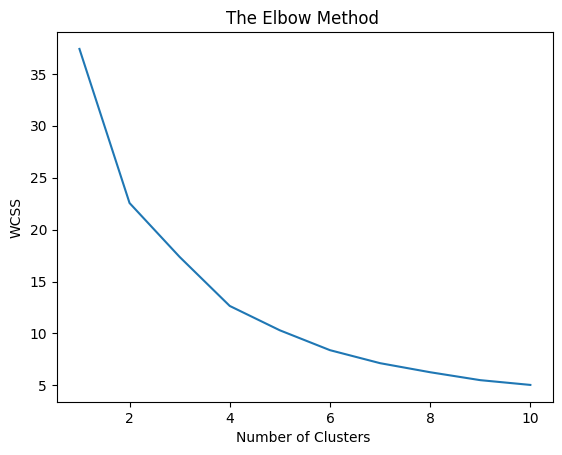

In [17]:
# Visualizing the ELBOW to get the optimal value of k.
# plot
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method ')
plt.xlabel('Number of Clusters ')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeansModel = KMeans(n_clusters = 2 , random_state = 0)
y_kmeans = kmeansModel.fit_predict(secondModel)
secondModel['Clusters'] = y_kmeans
secondModel

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0.019231,0.000000,0.387755,1
1,0.057692,0.000000,0.816327,1
2,0.038462,0.008197,0.051020,0
3,0.096154,0.008197,0.775510,1
4,0.250000,0.016393,0.397959,1
...,...,...,...,...
195,0.326923,0.860656,0.795918,1
196,0.519231,0.909836,0.275510,0
197,0.269231,0.909836,0.744898,1
198,0.269231,1.000000,0.173469,0


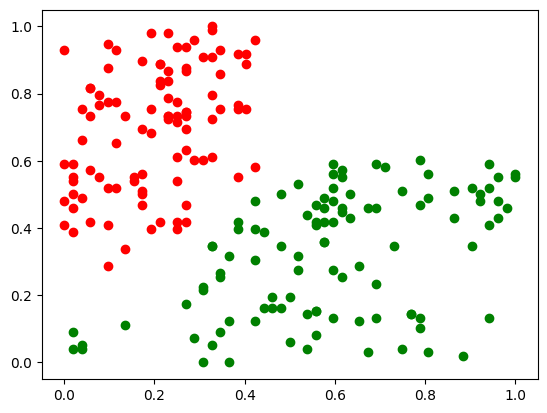

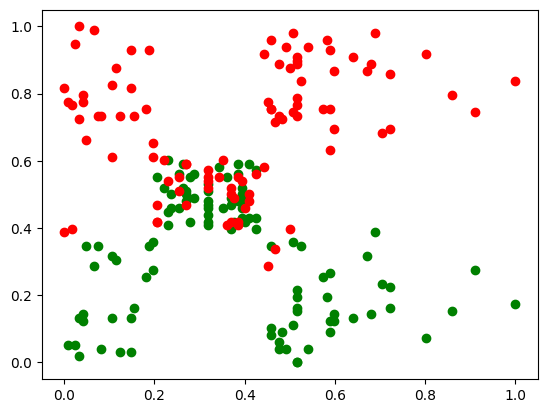

In [19]:
# Define the clusters of the different arrays
x1 = secondModel[secondModel.Clusters == 0] 
x2 = secondModel[secondModel.Clusters == 1] 
x3 = secondModel[secondModel.Clusters == 2] 
x4 = secondModel[secondModel.Clusters == 3] 
# plot the clusters with diffrenet colors
plt.scatter(x1['Age'],x1['Spending Score (1-100)'],color='green')
plt.scatter(x2['Age'],x2['Spending Score (1-100)'],color='red')
#plt.scatter(x3['Age'],x3['Spending Score (1-100)'],color='black')
#plt.scatter(x4['Age'],x4['Spending Score (1-100)'],color='blue')

plt.show()

# plot the clusters with diffrenet colors
plt.scatter(x1['Annual Income (k$)'],x1['Spending Score (1-100)'],color='green')
plt.scatter(x2['Annual Income (k$)'],x2['Spending Score (1-100)'],color='red')
#plt.scatter(x3['Annual Income (k$)'],x3['Spending Score (1-100)'],color='black')
#plt.scatter(x4['Annual Income (k$)'],x4['Spending Score (1-100)'],color='blue')
plt.show()

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x1 = secondModel[secondModel.Clusters == 0] 
x2 = secondModel[secondModel.Clusters == 1] 
#x3 = secondFit[secondFit.Clusters == 2] 
#x4 = secondFit[secondFit.Clusters == 3]

ax.scatter(x1['Age'],x1['Annual Income (k$)'],x1['Spending Score (1-100)'],color='green')
ax.scatter(x2['Age'],x2['Annual Income (k$)'],x2['Spending Score (1-100)'],color='red' )
#ax.scatter(x3['Annual Income (k$)'],x3['Spending Score (1-100)'],x3['Age'],color='black')
#ax.scatter(x4['Annual Income (k$)'],x4['Spending Score (1-100)'],x4['Age'],color='blue')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show()

<Figure size 640x480 with 0 Axes>

We can see from the two and three dimensions plots above that this model is able to divide the customers into two clusters, depending on their  Ages, incomes, and spending scores. And from the first plot which is for the ages of the customers and their spending scores,we can see that  younger customers are more likely to spend more than  older customers. In the second 2d plot, which is for the income of the customers and their spending score, we can see that there is no such a relation between the income and the spending score. However, from the graph, it is obvious that the customers can be divided to some clusters to let us try to do it.

## Third Model with Annual Income and Spending Score.

In [21]:
# define a new data frame with just two attributes.
thirdModel = selectedData[[ 'Annual Income (k$)' , 'Spending Score (1-100)']]

## 5.1 Number of clusters

In [22]:
# assume that the maximum number of clusters can be 10
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(secondModel)
    wcssIter = kmeans.inertia_ # find the value of wcss of the ith cluster
    wcss.append(wcssIter)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8